<a href="https://colab.research.google.com/github/zolfaShefreie/Seed-Clustering/blob/main/seed_clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#imports

In [1]:
import requests

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score
from sklearn.decomposition import PCA

#download dataset

In [4]:
def download_file(url: str, file_path):
  """
  download file and save on file path
  """
  file_content = requests.get(url).text
  file = open(file_path, 'w')
  file.write(file_content)
  file.close()

In [5]:
dataset_url = 'https://raw.githubusercontent.com/zolfaShefreie/Seed-Clustering/main/ds.csv'

dataset_file_path = "ds.csv"

In [6]:
download_file(dataset_url, dataset_file_path)

#load dataset

In [7]:
df = pd.read_csv(dataset_file_path)

In [8]:
df.shape

(13611, 17)

In [9]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,42711,769.073,289.085065,188.382767,1.534562,0.758518,43187,233.198058,0.707464,0.988978,0.907433,0.806676,6.768398,0.176792,361.153252,200.714657,SIRA
1,181985,1622.689,597.670516,390.655060,1.529919,0.756815,184037,481.363167,0.771816,0.988850,0.868510,0.805399,3.284175,0.085241,360.010387,199.474086,BOMBAY
2,38909,727.644,273.831540,181.243776,1.510847,0.749609,39304,222.576902,0.783950,0.989950,0.923468,0.812824,7.037743,0.189496,366.679165,200.636376,DERMASON
3,41646,767.796,287.906339,185.623114,1.551026,0.764407,42225,230.272304,0.737816,0.986288,0.887752,0.799817,6.913181,0.174510,355.037266,199.432618,SIRA
4,32959,680.960,254.941431,165.848851,1.537191,0.759475,33424,204.852879,0.723245,0.986088,0.893183,0.803529,7.735108,0.198908,358.340825,199.492841,DERMASON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,32618,674.388,258.303277,161.371051,1.600679,0.780837,32985,203.790401,0.707303,0.988874,0.901255,0.788958,7.919041,0.189264,345.462251,200.266340,DERMASON
13607,45678,773.561,269.258271,216.170438,1.245583,0.596199,46084,241.161846,0.775373,0.991190,0.959241,0.895653,5.894704,0.233991,445.217348,200.838931,SEKER
13608,25401,596.589,229.065638,141.542181,1.618356,0.786248,25745,179.837587,0.715965,0.986638,0.896830,0.785092,9.017977,0.211335,342.084994,200.498515,DERMASON
13609,27883,607.370,217.189372,164.023226,1.324138,0.655485,28169,188.419049,0.785990,0.989847,0.949823,0.867533,7.789311,0.272160,417.700947,200.309596,DERMASON


#dataset analyse

##basic

تنها ستون Perimeter دارای میسینگ ولیو می‌باشد.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13598 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [11]:
for column in df.columns:
  print(column, ": ",df[column].unique(), len(df[column].unique()))

Area :  [ 42711 181985  38909 ...  25401  27883  30610] 12011
Perimeter :  [ 769.073 1622.689  727.644 ...  596.589  607.37   637.739] 13339
MajorAxisLength :  [289.0850651 597.6705159 273.8315398 ... 229.0656383 217.1893724
 230.0637654] 13543
MinorAxisLength :  [188.3827673 390.6550596 181.2437758 ... 141.542181  164.0232263
 170.1246364] 13543
AspectRation :  [1.53456215 1.52991879 1.51084658 ... 1.618356   1.32413791 1.3523248 ] 13543
Eccentricity :  [0.75851835 0.75681472 0.74960931 ... 0.78624804 0.65548483 0.67319245] 13543
ConvexArea :  [ 43187 184037  39304 ...  25745  28169  30942] 12066
EquivDiameter :  [233.1980579 481.363167  222.5769023 ... 179.8375869 188.4190495
 197.4179892] 12011
Extent :  [0.70746372 0.77181621 0.78394987 ... 0.71596482 0.78599013 0.7782863 ] 13535
Solidity :  [0.98897817 0.98885007 0.98995013 ... 0.98663818 0.98984699 0.98927025] 13522
roundness :  [0.9074328  0.8685101  0.92346838 ... 0.89683014 0.94982302 0.94577372] 13540
Compactness :  [0.806676

طبق نتایج زیر مقادیر منفی برای سه ستون زیر غیر قابل قبول می‌باشد.<br/>
Area, Perimeter, MajorAxisLength<br/>
برخی از ستون‌ها دارای مقادیر اوت لایر هستند

In [12]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,1.359800e+04,1.361100e+04,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53043.806260,6.574124e+01,4.741549e+02,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,6.563609,0.171595,357.192551,200.007726
std,29332.196229,9.207540e+04,1.797124e+04,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,1.127998,0.059587,54.942864,0.877658
min,-30477.000000,-1.073607e+07,-2.252024e+02,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,2.778013,0.056417,227.737914,190.485168
25%,36328.000000,7.035628e+02,2.533134e+02,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,5.899917,0.115352,322.654018,199.734282
50%,44652.000000,7.949895e+02,2.968993e+02,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,6.645174,0.169353,356.334600,200.273574
75%,61332.000000,9.772175e+02,3.765043e+02,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,7.271420,0.217027,386.283488,200.574391
max,254616.000000,1.985370e+03,2.096932e+06,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,10.451169,0.366497,540.995770,200.946239


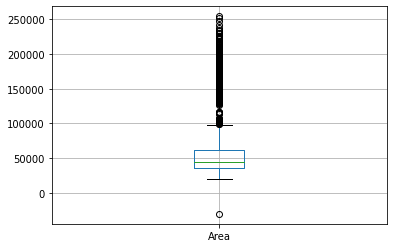

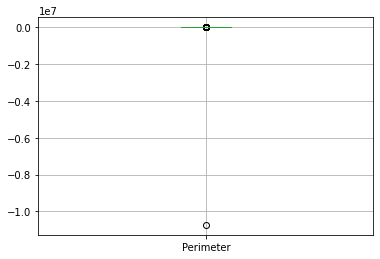

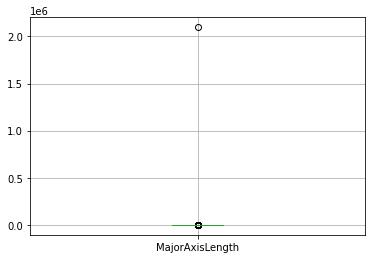

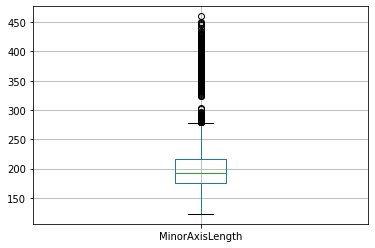

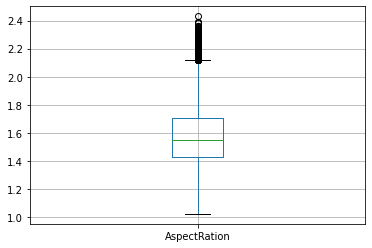

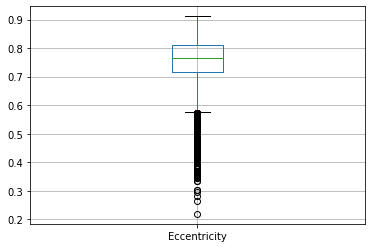

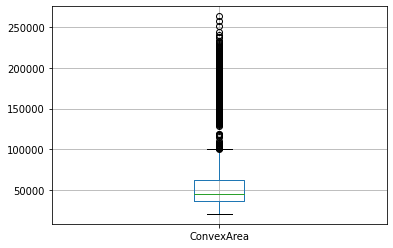

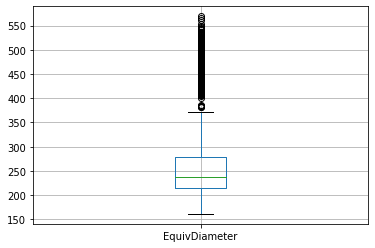

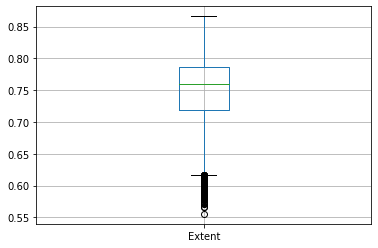

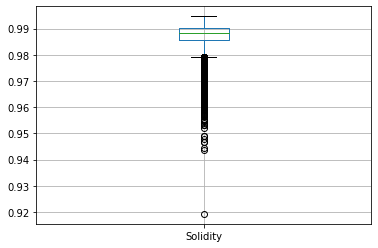

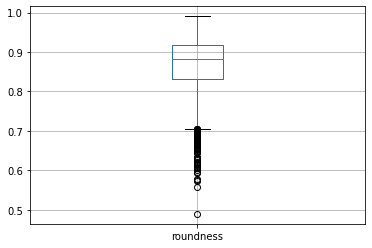

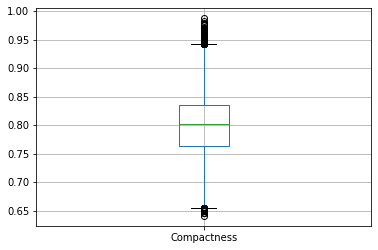

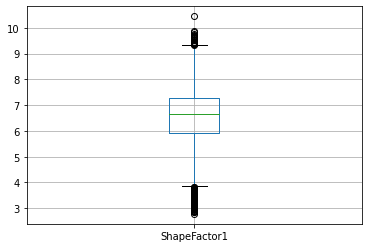

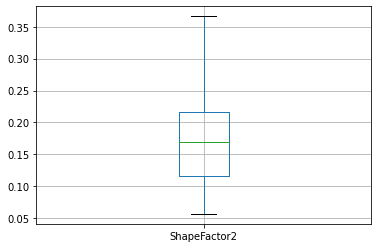

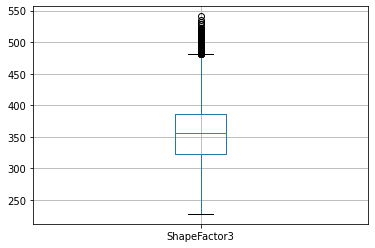

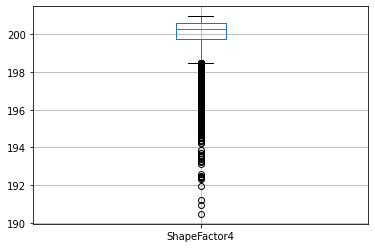

In [13]:
for column in df.select_dtypes(exclude=['object']):
    plt.figure()
    # plt.xlabel(column)
    df.boxplot([column])

طبق نتایج زیر رابطه‌های زیر باید بررسی شود:


*   Area and MinorAxisLength
*   Area and ConvexArea
*   Area and EquivDiameter
*   MinorAxisLength and ConvexArea
*   MinorAxisLength and EquivDiameter
*   MinorAxisLength and ShapeFactor1
*   AspectRation and Eccentricity
*   AspectRation and Compactness
*   AspectRation and ShapeFactor3
*   Eccentricity and Compactness
*   Eccentricity and ShapeFactor3
*   Eccentricity and ShapeFactor2
*   ConvexArea and EquivDiameter
*   EquivDiameter and ShapeFactor1
*   Compactness and ShapeFactor3
*   ShapeFactor2 and ShapeFactor3



In [14]:
df['ClassId'] = df.Class.astype('category').cat.codes

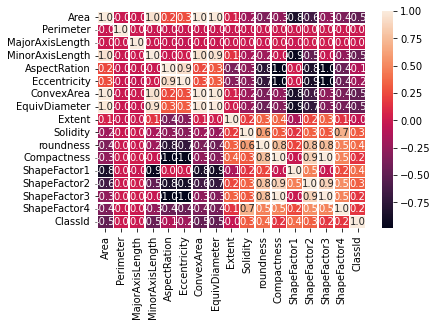

In [15]:
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f')

##Relations between Area, MinorAxisLength, EquivDiameter, ConvexArea, and ShapeFactor1

 می‌توان ستون اریا حذف شود زیر به ازای هر مقدار در ستون دیگر یک مقدار یونیک در ستون اریا موجود می‌باشد

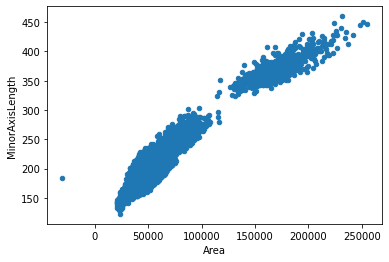

In [16]:
df.plot.scatter('Area', 'MinorAxisLength')

In [17]:
df.groupby('MinorAxisLength').Area.nunique().max()==1

True

In [18]:
df.groupby('Area').MinorAxisLength.nunique().max()==1

False

رابطه‌ی وارون پذیر. می‌توان هر یک از ستون‌های زیر را حذف نمود زیرا نمایانگر یکدیگر می‌باشند

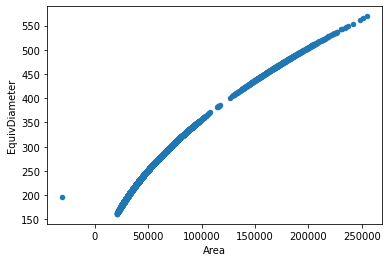

In [19]:
df.plot.scatter('Area', 'EquivDiameter')

In [20]:
df.groupby('Area').EquivDiameter.nunique().max()==1

True

In [21]:
df.groupby('EquivDiameter').Area.nunique().max()==1

True

رابطه‌ی نسبتا خطی اما رابطه‌ی ۱ به ۱ وجود ندارد

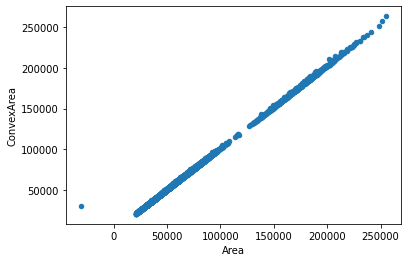

In [22]:
df.plot.scatter('Area', 'ConvexArea')

In [23]:
df.groupby('Area').ConvexArea.nunique().max()==1

False

In [24]:
df.groupby('ConvexArea').Area.nunique().max()==1

False

ستون کانوکس اریا می‌تواند حذف شود

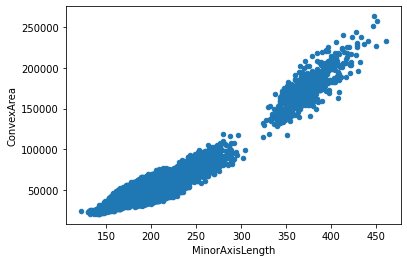

In [25]:
df.plot.scatter('MinorAxisLength', 'ConvexArea')

In [26]:
df.groupby('MinorAxisLength').ConvexArea.nunique().max()==1

True

In [27]:
df.groupby('ConvexArea').MinorAxisLength.nunique().max()==1

False

ستون EquivDiameter می‌تواند حذف شود

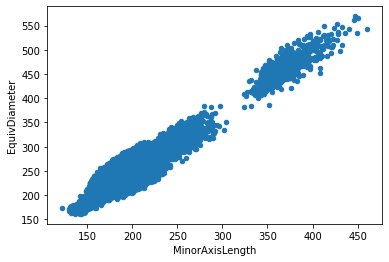

In [28]:
df.plot.scatter('MinorAxisLength', 'EquivDiameter')

In [29]:
df.groupby('MinorAxisLength').EquivDiameter.nunique().max()==1

True

In [30]:
df.groupby('EquivDiameter').MinorAxisLength.nunique().max()==1

False

امکان حذف ستون شیپ فکتور ۱ زیرا به ازای هر مقدار برای ستون دیگر یک مقدار یونیک برای شیپ فکتور ۱ موجود است

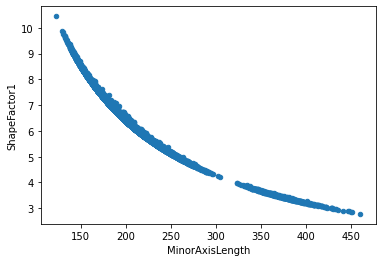

In [31]:
df.plot.scatter('MinorAxisLength', 'ShapeFactor1')

In [32]:
df.groupby('MinorAxisLength').ShapeFactor1.nunique().max()==1

True

In [33]:
df.groupby('ShapeFactor1').MinorAxisLength.nunique().max()==1

False

رابطه‌ی بین آن‌ها موجود است ولی هیچ‌کدام با دیگری رابطه یک به یک ندارند

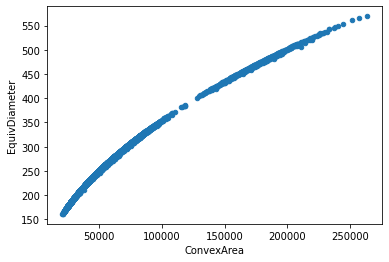

In [34]:
df.plot.scatter('ConvexArea', 'EquivDiameter')

In [35]:
df.groupby('EquivDiameter').ConvexArea.nunique().max()==1

False

In [36]:
df.groupby('ConvexArea').EquivDiameter.nunique().max()==1

False

رابطه ی ۱ به ۱ برای هیچ کدام از ستون‌ها صادق نمی‌باشد

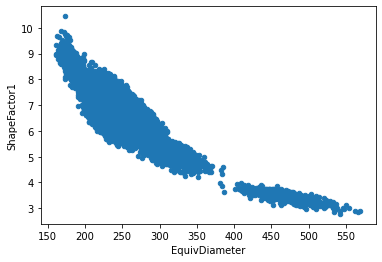

In [37]:
df.plot.scatter('EquivDiameter', 'ShapeFactor1')

In [38]:
df.groupby('EquivDiameter').ShapeFactor1.nunique().max()==1

False

In [39]:
df.groupby('ShapeFactor1').EquivDiameter.nunique().max()==1

False

طبق نتایج بالا ستون MinorAxisLength می‌تواند نماینده‌ی بقیه‌ی ستون‌ها باشد.

##Relations between AspectRation, Eccentricity, Compactness, ShapeFactor3, and ShapeFactor2

رابطه‌ی وارون پذیر می‌توان هر کدام از ستون‌ها را حذف کرد زیرا هر یک بیان گر دیگری هستند

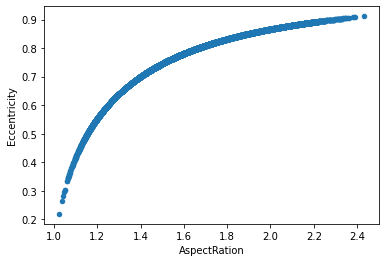

In [40]:
df.plot.scatter('AspectRation', 'Eccentricity')

In [41]:
df.groupby('AspectRation').Eccentricity.nunique().max()==1

True

In [42]:
df.groupby('Eccentricity').AspectRation.nunique().max()==1

True

رابطه‌ی وارون پذیر می‌توان یکی از ستون‌ها را حذف نمود

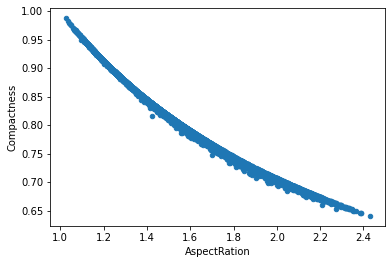

In [43]:
df.plot.scatter('AspectRation', 'Compactness')

In [44]:
df.groupby('AspectRation').Compactness.nunique().max()==1

True

In [45]:
df.groupby('Compactness').AspectRation.nunique().max()==1

True

رابطه‌ی وارون پذیر می‌توان یکی از ستون‌ها را حذف نمود

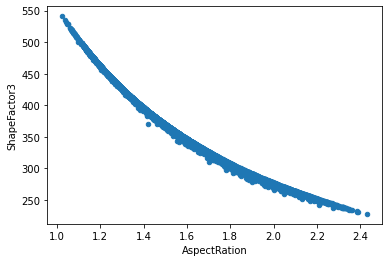

In [46]:
df.plot.scatter('AspectRation', 'ShapeFactor3')

In [47]:
df.groupby('AspectRation').ShapeFactor3.nunique().max()==1

True

In [48]:
df.groupby('ShapeFactor3').AspectRation.nunique().max()==1

True

رابطه‌ی وارون پذیر. یکی از ستون‌ها امکان حذف دارد

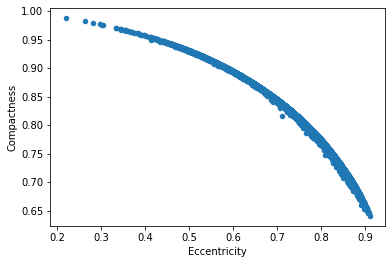

In [49]:
df.plot.scatter('Eccentricity', 'Compactness')

In [50]:
df.groupby('Eccentricity').Compactness.nunique().max()==1

True

In [51]:
df.groupby('Compactness').Eccentricity.nunique().max()==1

True

رابطه‌ی وارون پذیر یکی از آن‌ها می‌تواند حذف شود

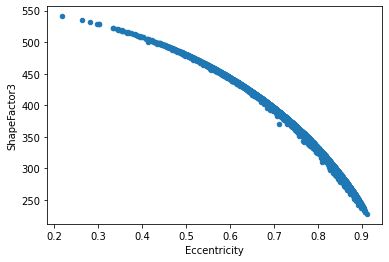

In [52]:
df.plot.scatter('Eccentricity', 'ShapeFactor3')

In [53]:
df.groupby('Eccentricity').ShapeFactor3.nunique().max()==1

True

In [54]:
df.groupby('ShapeFactor3').Eccentricity.nunique().max()==1

True

شیپ فکتور ۲ را می‌توان حذف نمود زیرا به ازای مقدار ستوان دیگری یک مقدار یونیک برای شیپ فکتور ۲ وجود دارد

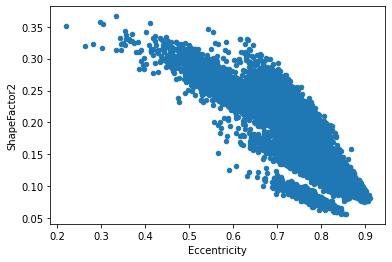

In [55]:
df.plot.scatter('Eccentricity', 'ShapeFactor2')

In [56]:
df.groupby('Eccentricity').ShapeFactor2.nunique().max()==1

True

In [57]:
df.groupby('ShapeFactor2').Eccentricity.nunique().max()==1

False

شیپ فکتور ۲ را می‌توان حذف کرد

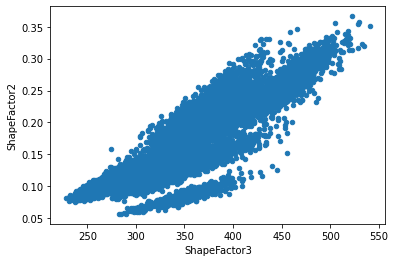

In [58]:
df.plot.scatter('ShapeFactor3', 'ShapeFactor2')

In [59]:
df.groupby('ShapeFactor3').ShapeFactor2.nunique().max()==1

True

In [60]:
df.groupby('ShapeFactor2').ShapeFactor3.nunique().max()==1

False

طبق نتایج بالا Eccentricity می‌تواند نماینده‌ی بقیه‌ی ستون‌ها باشد.

#preprocessing

## Delete columns
طبق نتایجی که در آنالیز بدست آمده است برخی از ستون‌ها حذف می‌شوند

In [61]:
df = df.drop(['AspectRation', 'Compactness', 'ShapeFactor3', 'ShapeFactor2'], axis=1)

In [62]:
df = df.drop(['Area', 'EquivDiameter', 'ConvexArea', 'ShapeFactor1'], axis=1)

##hadle unreasonable values and missing values and outliers

مقادیر غیر قابل قبول را با نال پر می‌کنیم تا در فرآیند پر کردن میسینگ ولیو‌ها مقدار جدیدی بگیرند

In [63]:
df.loc[df["Perimeter"] <=0, "Perimeter"] = np.nan

In [64]:
for class_name in df['Class'].unique():
    df.Perimeter.fillna(df[df['Class']==class_name].Perimeter.mean(), inplace=True)

In [65]:
df.loc[df["MajorAxisLength"] <=0, "MajorAxisLength"] = np.nan

In [66]:
for class_name in df['Class'].unique():
    df.MajorAxisLength.fillna(df[df['Class']==class_name].MajorAxisLength.mean(), inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Perimeter        13611 non-null  float64
 1   MajorAxisLength  13611 non-null  float64
 2   MinorAxisLength  13611 non-null  float64
 3   Eccentricity     13611 non-null  float64
 4   Extent           13611 non-null  float64
 5   Solidity         13611 non-null  float64
 6   roundness        13611 non-null  float64
 7   ShapeFactor4     13611 non-null  float64
 8   Class            13611 non-null  object 
 9   ClassId          13611 non-null  int8   
dtypes: float64(8), int8(1), object(1)
memory usage: 970.4+ KB


outliers for kmeans and agglomerative<br/>
برای عملکرد بهتر کلاستر‌ها بهتر از اوت‌لایر‌ها حذف شوند به همین علت اوت‌لایر‌ها با توجه به کلاسشان حذف و جایگزین می‌شود (اگر مقادیر یک کلاس بالا باشد نسبت به خودش اصلاح گردد تا حالت‌های متمایز کلاس نسبت به دیگر کلاس‌ها ازبین نرود)<br/>
دی بی اسکن توانایی تشخیص نویز دارد به همین علت داده‌ها به دو صورت با اوت لایر و بدون آن تست می‌شود.

In [68]:
columns = list(df.columns)
columns.remove('Class')
columns.remove('ClassId')
columns

['Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'Eccentricity',
 'Extent',
 'Solidity',
 'roundness',
 'ShapeFactor4']

In [69]:
df_no_outliers = df.copy()
for col in columns:
    for class_name in df_no_outliers['Class'].unique():
      q1 = df_no_outliers[df_no_outliers['Class']==class_name][col].quantile(0.25)
      q3 = df_no_outliers[df_no_outliers['Class']==class_name][col].quantile(0.75)
      IQR = q3 - q1
      upper = q3 + 1.5 * IQR
      lower = q1 - 1.5 * IQR
      condition = ((df_no_outliers['Class'] == class_name) & 
                   ((df_no_outliers[col] < lower) | (df_no_outliers[col] > upper)))
      df_no_outliers.loc[condition, col] = np.nan
      df_no_outliers[col].fillna(df_no_outliers[df_no_outliers['Class']==class_name][col].mean(), inplace=True)

In [70]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Perimeter        13611 non-null  float64
 1   MajorAxisLength  13611 non-null  float64
 2   MinorAxisLength  13611 non-null  float64
 3   Eccentricity     13611 non-null  float64
 4   Extent           13611 non-null  float64
 5   Solidity         13611 non-null  float64
 6   roundness        13611 non-null  float64
 7   ShapeFactor4     13611 non-null  float64
 8   Class            13611 non-null  object 
 9   ClassId          13611 non-null  int8   
dtypes: float64(8), int8(1), object(1)
memory usage: 970.4+ KB


##Normalization

In [71]:
scaler = MinMaxScaler()

In [72]:
columns = list(df.columns)
columns.remove('Class')
columns.remove('ClassId')
columns

['Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'Eccentricity',
 'Extent',
 'Solidity',
 'roundness',
 'ShapeFactor4']

In [73]:
normalization_data = scaler.fit_transform(df_no_outliers[columns])

In [74]:
normalization_data_with_outli = scaler.fit_transform(df[columns])

#Clustring model
مدل‌ها با استفاده از معیار‌های زیر ارزیابی می‌شوند


1.   adjusted_rand_score
2.   adjusted_mutual_info_score
3.   silhouette_score

<p>در دو مورد اول معیار براساس کلاستر واقعی که در اختیار داریم مدل ارزیابی می‌شود یعنی چه میزان خوشه‌بندی داده‌ها توسط مدل با خوشه‌بندی اصلی داده‌ها شباهت دارد. اما در مورد سوم داده‌ها براساس خوشه‌ای که برای آن‌ها اختصاص داده می‌شود بحث می‌شود یعنی مدل از لحاظ میزان خوب بودن جد‌اسازی داده‌ها و نزدیکی داده‌های یک خوشه (فشردگی داده‌ها در یک خوشه) ارزیابی خواهد شد<p/>
طبق نتایج زیر مدل‌ها به ترتیب زیر عملکرد بهتری از نظر درستی خوشه‌ها نسبت‌ به خوشه‌های اصلی، را داشته‌اند:


*   Agglomerative (without outliers)
*   Kmeans (without outliers)
*   DBScan with outliers
*   DBScan without outliers





##Kmeans

تغییر مقادیر پارامتر‌ها باعث بهبود کلاسترینگ نشد

In [75]:
kmeans_model = KMeans(n_clusters=7)
kmeans_model.fit(normalization_data)

KMeans(n_clusters=7)

In [76]:
kmeans_model.labels_

array([3, 4, 3, ..., 3, 1, 3], dtype=int32)

In [77]:
adjusted_rand_score(labels_true=df['ClassId'], labels_pred=kmeans_model.labels_)

0.533909575079872

In [78]:
adjusted_mutual_info_score(labels_true=df['ClassId'], labels_pred=kmeans_model.labels_)

0.6565862526671141

In [79]:
silhouette_score(normalization_data, kmeans_model.labels_)

0.3279612849691294

##Agglomerative

تغییر مقادیر پارامتر‌ها باعث بهبود کلاسترینگ نشد

In [80]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=7)
agglomerative_clustering.fit(normalization_data)

AgglomerativeClustering(n_clusters=7)

In [81]:
adjusted_rand_score(labels_true=df['ClassId'], labels_pred=agglomerative_clustering.labels_)

0.5616136676566953

In [82]:
adjusted_mutual_info_score(labels_true=df['ClassId'], labels_pred=agglomerative_clustering.labels_)

0.7235189832288164

In [83]:
silhouette_score(normalization_data, agglomerative_clustering.labels_)

0.30752458463587656

##DBScan

طبق بررسی‌ها اجرا‌های متعدد برای مقادیر متفاوت اپسیلون و مینیمم سمپل بهترین عملکرد مطابق با پایین می‌باشد. این مقادیر برای پارامتر‌ها به‌صورتی تست شده‌اند که تعداد کلاستر‌های بدست آمده طبق صورت پروژه در این الگوریتم دقیقا برابر ۷ باشند

###without outlier

In [84]:
DBScan_clustring = DBSCAN(eps=0.095, min_samples=22)
DBScan_clustring.fit(normalization_data)

DBSCAN(eps=0.095, min_samples=22)

number of clusters<br/>
مقدار -۱ بدست آمده نویز به حساب می‌آیند بنابراین در صورت وجود نویز یک از طول آرایه‌ی یونیک شماره کلاستر‌ها کم می‌کنیم

In [85]:
len(set(DBScan_clustring.labels_)) - (1 if -1 in DBScan_clustring.labels_ else 0)

7

In [86]:
adjusted_rand_score(labels_true=df['ClassId'], labels_pred=DBScan_clustring.labels_)

0.2602868720153313

In [87]:
adjusted_mutual_info_score(labels_true=df['ClassId'], labels_pred=DBScan_clustring.labels_)

0.4186679618446456

In [88]:
silhouette_score(normalization_data, DBScan_clustring.labels_)

0.045811151075956236

###with outlier

In [89]:
DBScan_clustring = DBSCAN(eps=0.06, min_samples=22)
DBScan_clustring.fit(normalization_data_with_outli)

DBSCAN(eps=0.06, min_samples=22)

In [90]:
len(set(DBScan_clustring.labels_)) - (1 if -1 in DBScan_clustring.labels_ else 0)

7

In [91]:
adjusted_rand_score(labels_true=df['ClassId'], labels_pred=DBScan_clustring.labels_)

0.2451115113673564

In [92]:
adjusted_mutual_info_score(labels_true=df['ClassId'], labels_pred=DBScan_clustring.labels_)

0.4026385807133733

In [93]:
silhouette_score(normalization_data, DBScan_clustring.labels_)

0.056719523499816696

#PCA

طبق نتایج استفاده از فشرده سازی اطلاعات زیادی را ازبین می‌برد که از ۷ کلاستر  تنها یک کلاس به‌خوبی تفکیک خواهد شد و در بقیه‌ی کلاس‌ها برخی از ناحیه‌ها هم‌پوشانی می‌شود که در ۲ کلاس ناحیه کاملا بر روی یک دیگر قرار دارد و یکی از دیگر کلاس‌ها همپوشانی زیادی با دیگر داده‌ها دارد. بنابراین خوشه‌بندی دوبعدی با دقت بالا امکان پذیر نمی‌باشد. 

In [94]:
pca = PCA(n_components=2)
comperssed_data = pca.fit_transform(normalization_data)
comperssed_data

array([[-0.15787768, -0.09053911],
       [ 0.6517787 ,  0.71380498],
       [-0.25055225,  0.01796336],
       ...,
       [-0.21476215, -0.28708406],
       [-0.42988022,  0.02907554],
       [-0.36157487,  0.02059342]])

In [95]:
comperssed_data.shape

(13611, 2)

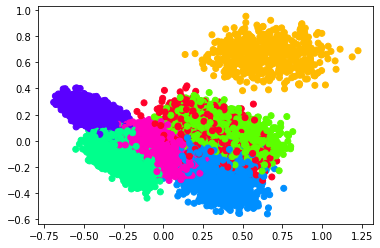

In [96]:
plt.scatter(comperssed_data.T[0], comperssed_data.T[1], c=df['ClassId'], cmap='gist_rainbow')